In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 

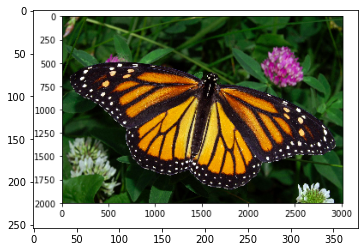

In [18]:
# Read in the image
image = cv2.imread('monarch.png')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [19]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)


In [20]:
def show(k):
    #the below line of code defines the criteria for the algorithm to stop running,
    #which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
    #becomes 85%
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

    # then perform k-means clustering wit h number of clusters defined as 3
    #also random centres are initially choosed for k-means clustering

    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    
    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((image.shape))
    
    plt.imshow(segmented_image)

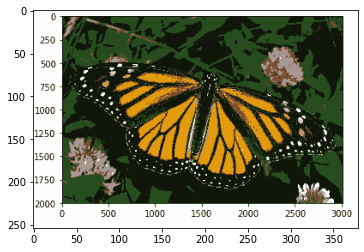

In [21]:
show(6)